In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Task

Your task in this assignment is to predict the ethnicity of someone's DNA, based on single nucleotide polymorphism data we've shared with you

## Data values

Each input vector represents the DNA at specific locations in the genome for one individual. There are 20 binary input features. 0 indicates that the user's DNA at the given location matches the human reference genome. 1 indicates that the user's DNA does not match the human reference genome. The output class value represents the super population (ethnicity) of each individual. The super populations contained in this dataset are East Asian or Mixed American, encoded in binary. The training data set contains 283 data vectors, and the testing data set contains 184 data vectors.

In [2]:
df = pd.read_csv('datasets/ancestry-train.txt', sep= " ", header=None)
df.columns = ['SNP1', 'SNP2', 'SNP3', 'SNP4','SNP5', 'SNP6', 'SNP7', 'SNP8', 'SNP9', 'SNP10', 'SNP11', 'SNP12', 'SNP13', 'SNP14', 'SNP15', 'SNP16', 'SNP17', 'SNP18', 'SNP19', 'SNP20', 'Ethnicity']

In [3]:
df.head()

,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,SNP10,...,SNP12,SNP13,SNP14,SNP15,SNP16,SNP17,SNP18,SNP19,SNP20,Ethnicity
0,1,0,0,0,0,0,0,1,1,1,...,1,0,1,0,0,1,0,1,1:,0
1,1,0,0,0,0,0,0,1,1,1,...,0,0,1,1,1,0,0,0,1:,0
2,1,0,0,0,0,0,0,1,1,1,...,1,0,1,1,1,0,1,0,1:,0
3,1,0,0,0,0,0,0,1,1,1,...,1,0,1,0,0,0,0,1,1:,0
4,1,0,1,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,0:,0


Fixing the colon glitch for SNP19

In [4]:
def fix(x):
    x = x[0]
    return int(x)

In [5]:
df['SNP20'] = df['SNP20'].apply(fix)

## Exploratory data analysis

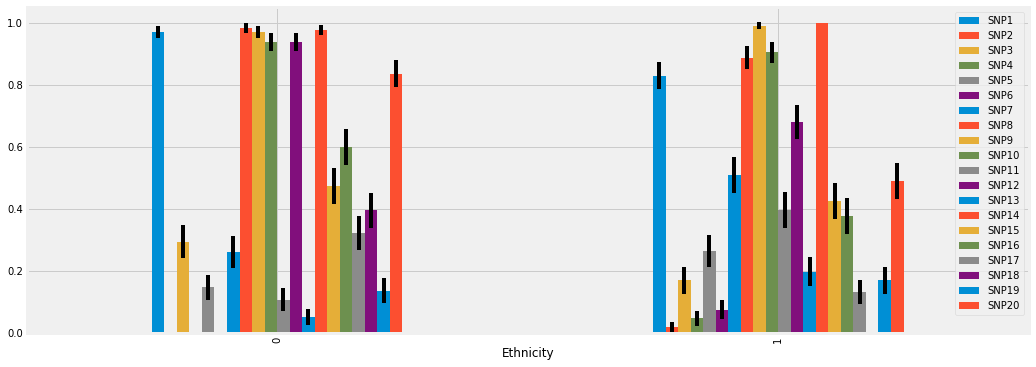

In [9]:
df.groupby('Ethnicity').mean().plot(kind='bar', yerr = 1.96*df.groupby('Ethnicity').std()/np.sqrt(len(df)))
plt.rcParams["figure.figsize"] = (20,10)

In [10]:
df1 = df.groupby('Ethnicity').mean()

In [11]:
df1 = df1.diff()
df1.reset_index()

,Ethnicity,SNP1,SNP2,SNP3,SNP4,SNP5,SNP6,SNP7,SNP8,SNP9,...,SNP11,SNP12,SNP13,SNP14,SNP15,SNP16,SNP17,SNP18,SNP19,SNP20
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-0.141563,0.018868,-0.123974,0.04717,0.117258,0.075472,0.249547,-0.096258,0.018815,...,0.288882,-0.258608,0.147266,0.022599,-0.050048,-0.221512,-0.189958,-0.39548,0.034218,-0.345592


In [12]:
df1.sort_values(by = 1, axis=1, ascending=False, inplace=True)

In [13]:
pd.crosstab(df.Ethnicity, df.SNP20, normalize='index')

SNP20,0,1
Ethnicity,,
0,0.163842,0.836158
1,0.509434,0.490566


In [14]:
pd.crosstab(df.Ethnicity, [df.SNP18, df.SNP12, df.SNP20, df.SNP16])

SNP18       0                            1                 
SNP12       0             1              0     1           
SNP20       0      1      0       1      1     0      1    
SNP16       0  1   0  1   0   1   0   1  0  1  0  1   0   1
Ethnicity                                                  
0           1  1   2  5   4  11  35  48  1  1  5  7  23  33
1          11  5  12  6  25  13  18  16  0  0  0  0   0   0

In [15]:
df_test = pd.concat([df[df1.columns], df['Ethnicity']])

In [16]:
df_test = df[df1.columns]

In [17]:
df_test = df_test.assign(Ethnicity = df['Ethnicity'])

In [18]:
df_test.head()

,SNP11,SNP7,SNP13,SNP5,SNP6,SNP4,SNP19,SNP14,SNP2,SNP9,...,SNP15,SNP8,SNP3,SNP1,SNP17,SNP16,SNP12,SNP20,SNP18,Ethnicity
0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,1,0,1,...,1,1,0,1,0,1,1,1,1,0
3,0,0,0,0,0,0,1,1,0,1,...,0,1,0,1,0,0,1,1,0,0
4,0,0,0,1,0,0,0,1,0,1,...,0,1,1,1,0,0,1,0,1,0


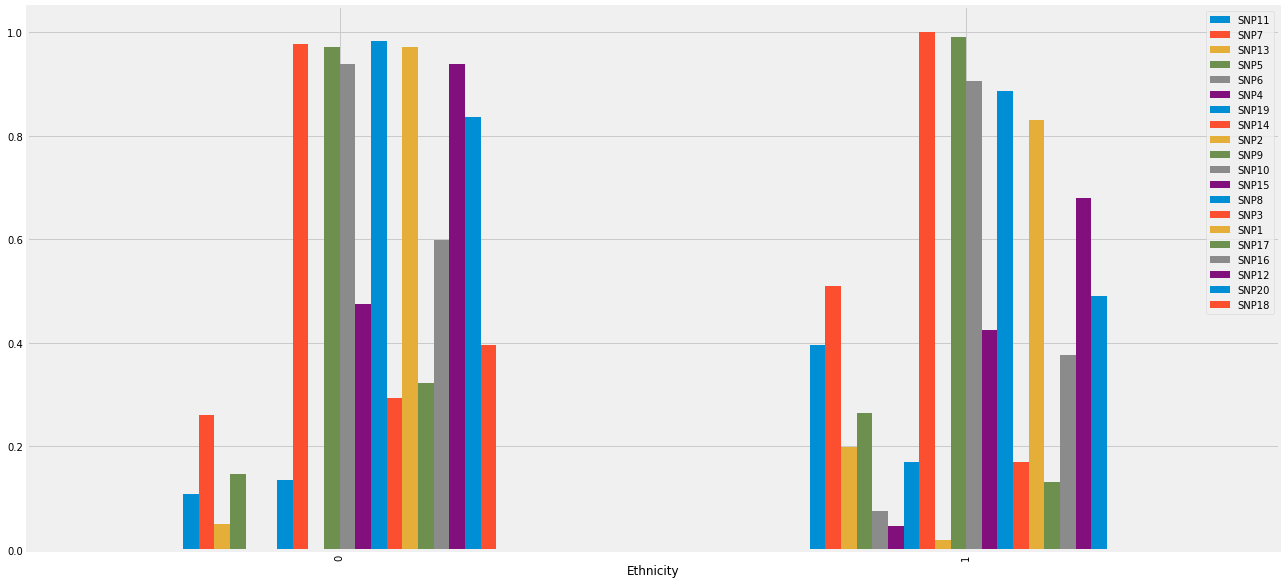

In [19]:
df_test.groupby('Ethnicity').mean().plot(kind='bar')

## Making predictions

In [20]:
df = df.assign(Prediction = "")

In [21]:
for (row_index, row_data) in df.iterrows():
    print(row_index)
    if(df['SNP18'][row_index] == 1):
        df['Prediction'][row_index] = 0
    elif(df['SNP12'][row_index] == 0):
        df['Prediction'][row_index] = 1
    elif((df['SNP12'][row_index] == 1) & (df['SNP20'][row_index] == 0) & (df['SNP16'][row_index] == 0)):
        df['Prediction'][row_index] = 1
    elif((df['SNP12'][row_index] == 1) & (df['SNP20'][row_index] == 1)):
        df['Prediction'][row_index] = 0
    elif(np.random.rand() > 0.5):
        df['Prediction'][row_index] = 0
    else:
        df['Prediction'][row_index] = 1    

0
1
2
3
4
5
6
7
8
9


/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


10
11
12
13
14
15
16
17
18
19
20
21
22


/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


23
24
25
26
27
28
29
30
31
32
33
34
35


/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


/home/cse/anaconda2/envs/p37env/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282


## Evaluating model performance

In [22]:
pd.crosstab(df['Ethnicity'], df['Prediction'])

Prediction,0,1
Ethnicity,,
0,157,20
1,42,64


In [23]:
df['Ethnicity'].value_counts()

0    177
1    106
Name: Ethnicity, dtype: int64

In [24]:
df['Prediction'].value_counts()

0    199
1     84
Name: Prediction, dtype: int64